<b>Topic :</b>
Implementation of Supervised Learning on Regression Task



#### Background
This project aims to apply the Implementation of supervised learning on regression in predicting real estate property values ​​using the UCI Real Estate Valuation dataset. We will use the Support Vector Machine (SVM) methods in the Python programming language. The results will help make smart decisions in real estate property transactions and investments.



# **DATA PRE PROCESSING**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances
from math import radians
from scipy import stats
import seaborn as sns

In [4]:
df = pd.read_excel('real_estate_valuation.xlsx')

In [ ]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
# dropping the 'No' columns
df = df.drop(['No'], axis = 1)

In [6]:
# cleaning the data so it becomes more readable


# changing the columns name
column_names = ['transaction_date','house_age','distance_mrt','num_conv_store','lat','long','price']
df.columns = column_names

# changing the transaction date into YYYY format
df['transaction_date'] = df['transaction_date'].astype(str).str.split('.').str[0].str[:4]
df['transaction_date'] = df['transaction_date'].astype(int)

# assuming that the latitude and longitude is calculated from the city center
city_center = [df['lat'].mean(), df['long'].mean()]
df['distance_to_city_center'] = haversine_distances(
    np.radians(df[['lat', 'long']]), np.radians([city_center])
) * 6371000/1000 # Convert from radians to kilometers



In [7]:
# since we have a new value that combines lat and long, we can drop the columns
df = df.drop(['lat'], axis = 1)
df = df.drop(['long'], axis = 1)

In [8]:
df

,transaction_date,house_age,distance_mrt,num_conv_store,price,distance_to_city_center
0,2012,32.0,84.87882,10,37.9,1.699077
1,2012,19.5,306.59470,9,42.2,1.402042
2,2013,13.3,561.98450,5,47.3,2.308732
3,2013,13.3,561.98450,5,54.8,2.308732
4,2012,5.0,390.56840,5,43.1,1.470115
...,...,...,...,...,...,...
409,2013,13.7,4082.01500,0,15.4,4.267585
410,2012,5.6,90.45606,9,50.0,1.144991
411,2013,18.8,390.96960,7,40.6,1.309768
412,2013,8.1,104.81010,5,52.5,0.779526


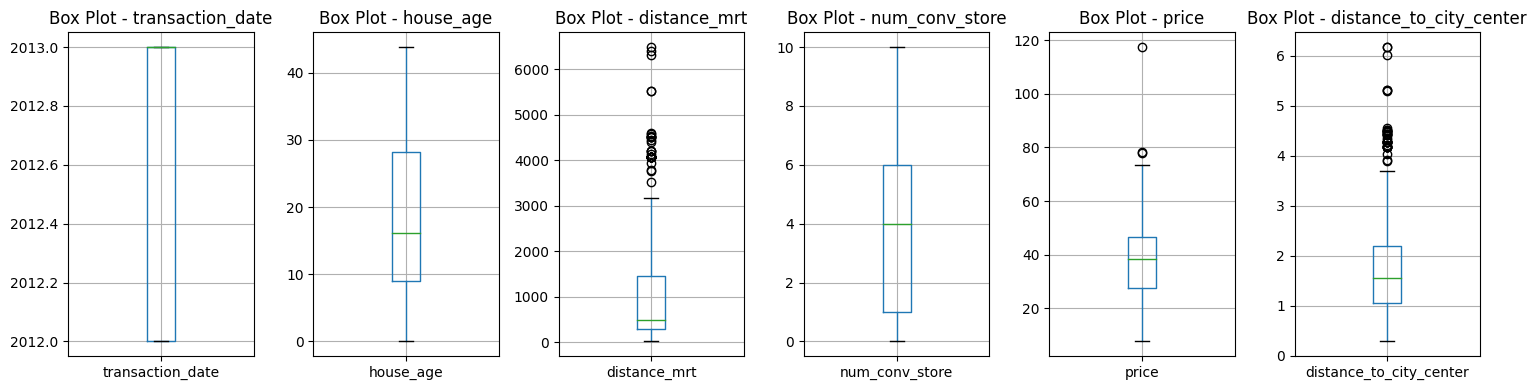

In [ ]:
# using boxplots to identify if there is any outlier
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 4))

for i, column in enumerate(df.columns):
    df[[column]].boxplot(ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

<b> As we can see here, there are good amounts of outliers in 'distance_mrt' and 'distance_to_city_center' </b>

In [ ]:
# Apply log transformation to 'distance_mrt' and 'distance_to_city_center'
constant = 1e-3
df['log_distance_mrt'] = np.log(df['distance_mrt'] + constant)
df['log_distance_to_city_center'] = np.log(df['distance_to_city_center'] + constant)

# Drop the original 'distance_mrt' and 'distance_to_city_center' columns as we have their log-transformed versions
df = df.drop(columns=['distance_mrt', 'distance_to_city_center'])

In [ ]:
#dropping transaction date because it is only from 2012-2013 which will not really make a slight difference
df = df.drop(['transaction_date'], axis = 1)

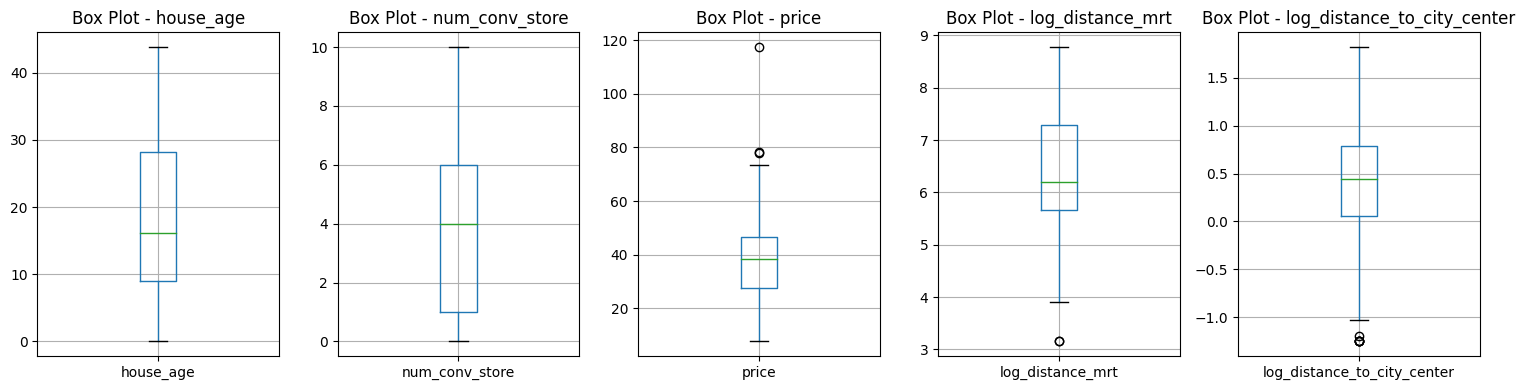

In [ ]:
# using boxplots to identify if there is any outlier
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(15, 4))

for i, column in enumerate(df.columns):
    df[[column]].boxplot(ax=axes[i])
    axes[i].set_title(f'Box Plot - {column}')

plt.tight_layout()
plt.show()

# **DATA EXPLORATION**

## Histogram

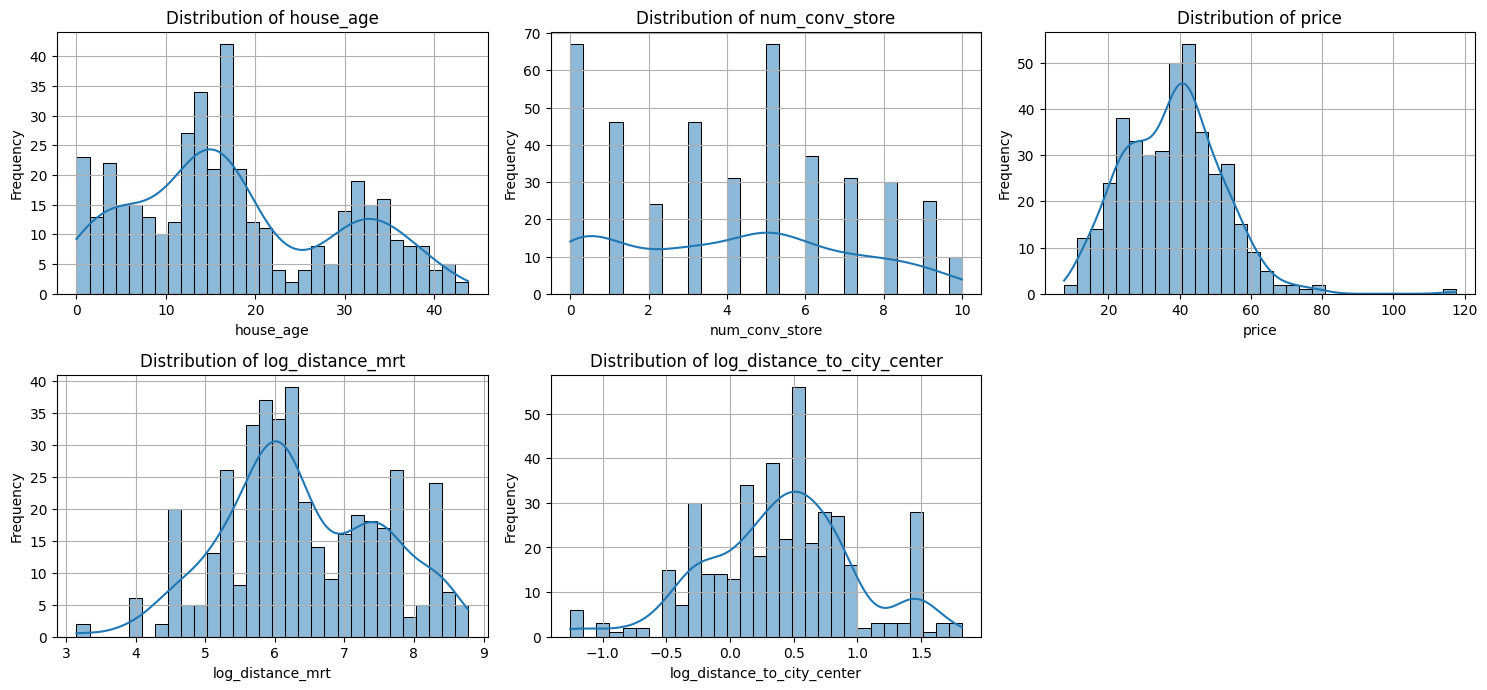

In [ ]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

## Standard Deviation

In [ ]:
std_dev = df.std()
print("Standard Deviation:\n", std_dev)

Standard Deviation:
 house_age                      11.392485
num_conv_store                  2.945562
price                          13.606488
log_distance_mrt                1.119706
log_distance_to_city_center     0.580376
dtype: float64


## Correlation

In [ ]:
correlation = df.corr()['price']
print(correlation)

house_age                     -0.210567
num_conv_store                 0.571005
price                          1.000000
log_distance_mrt              -0.734339
log_distance_to_city_center   -0.514123
Name: price, dtype: float64


# **MODEL BUILDING**

#### Ringkasan Metode
Silahkan double click cell ini dan tulis ringkasan metode!

## Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['price'])
y = df['price']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331, 4), (83, 4), (331,), (83,))

## **SVM**

### Model 1

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the SVR model
svm_model = SVR()

# Define the second SVM model with a linear kernel and different parameters from the best model
svm_model_1 = SVR(C=5, epsilon=0.01, kernel='rbf')

# Train the second SVM model
svm_model_1.fit(X_train, y_train)

# Predictions on the test set for the second SVM model
svm_predictions_1 = svm_model_1.predict(X_test)

# Evaluate the second SVM model
svm_mae_1 = mean_absolute_error(y_test, svm_predictions_1)
svm_mse_1 = mean_squared_error(y_test, svm_predictions_1)
svm_r2_1 = r2_score(y_test, svm_predictions_1)

# Output the evaluation metrics for the second SVM model
svm_mae_1, svm_mse_1, svm_r2_1


(4.588068213896125, 45.75780050527888, 0.7272420708785974)

### Model 2

In [ ]:
# Define the second SVM model with a linear kernel and different parameters from the best model
svm_model_2 = SVR(C=20, epsilon=0.01, kernel='poly')

# Train the second SVM model
svm_model_2.fit(X_train, y_train)

# Predictions on the test set for the second SVM model
svm_predictions_2 = svm_model_2.predict(X_test)

# Evaluate the second SVM model
svm_mae_2 = mean_absolute_error(y_test, svm_predictions_2)
svm_mse_2 = mean_squared_error(y_test, svm_predictions_2)
svm_r2_2 = r2_score(y_test, svm_predictions_2)

# Output the evaluation metrics for the second SVM model
svm_mae_2, svm_mse_2, svm_r2_2


(6.566519618777069, 78.48781265447825, 0.5321415582806621)

### Model 3

In [ ]:
# Define the second SVM model with a linear kernel and different parameters from the best model
svm_model_3 = SVR(C=0.1, epsilon=0.01, kernel='linear')

# Train the second SVM model
svm_model_3.fit(X_train, y_train)

# Predictions on the test set for the second SVM model
svm_predictions_3 = svm_model_3.predict(X_test)

# Evaluate the second SVM model
svm_mae_3 = mean_absolute_error(y_test, svm_predictions_3)
svm_mse_3 = mean_squared_error(y_test, svm_predictions_3)
svm_r2_3 = r2_score(y_test, svm_predictions_3)

# Output the evaluation metrics for the second SVM model
svm_mae_3, svm_mse_3, svm_r2_3


(5.053573486663545, 56.383216833546435, 0.6639049672209019)

## **Linear Regression**

In [ ]:

def initialize_weights_and_bias(num_features):
    weights = np.zeros(num_features)
    bias = 0
    return weights, bias

def compute_predictions(X, weights, bias):
    return np.dot(X, weights) + bias

def compute_loss(predictions, y):
    return np.mean((predictions - y) ** 2)

def update_weights_and_bias(X, y, predictions, weights, bias, learning_rate):
    num_samples = len(y)

    # Compute gradients
    dw = (1/num_samples) * np.dot(X.T, (predictions - y))
    db = (1/num_samples) * np.sum(predictions - y)

    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    return weights, bias

def train_linear_regression(X_train, y_train, num_epochs=1000, learning_rate=0.01):
    num_features = X_train.shape[1]
    weights, bias = initialize_weights_and_bias(num_features)

    for epoch in range(num_epochs):
        # Forward pass
        predictions = compute_predictions(X_train, weights, bias)

        # Compute loss
        loss = compute_loss(predictions, y_train)

        # Backward pass
        weights, bias = update_weights_and_bias(X_train, y_train, predictions, weights, bias, learning_rate)

        # Print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Loss: {loss}')

    return weights, bias

# Train the model
num_epochs = 1000
learning_rate = 0.01
weights, bias = train_linear_regression(X_train, y_train, num_epochs, learning_rate)

# Make predictions on the test set
test_predictions = compute_predictions(X_test, weights, bias)

# Evaluate the model
test_loss = compute_loss(test_predictions, y_test)
print(f'Test Loss: {test_loss}')


Epoch 0, Loss: 1662.0009063444106
Epoch 100, Loss: 280.4524341723346
Epoch 200, Loss: 109.31498815906983
Epoch 300, Loss: 86.43206067723759
Epoch 400, Loss: 83.1284004637296
Epoch 500, Loss: 82.49588779690144
Epoch 600, Loss: 82.26778775734753
Epoch 700, Loss: 82.1288100191216
Epoch 800, Loss: 82.02799879111565
Epoch 900, Loss: 81.95212750316945
Test Loss: 59.2359172630412


In [ ]:
result_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': test_predictions})

# Print the first few rows of the table
print(result_df.head())

     Actual Values  Predicted Values
358           45.1         52.436408
350           42.3         43.449918
373           52.2         46.368377
399           37.3         46.434533
369           22.8         27.571222


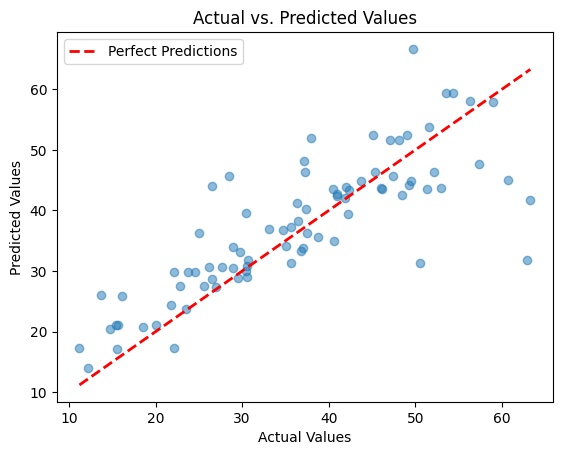

In [ ]:
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a line representing perfect predictions (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Predictions')

plt.legend()
plt.show()

# **MODEL EVALUATION**

In [ ]:
print("SVM (Model_1) Mean Absolute Error:", svm_mae_1)
print("SVM (Model_1) Mean Squared Error:", svm_mse_1)
print("SVM (Model_1) R^2 Score:", svm_r2_1)

print("\nSVM (Model_2) Mean Absolute Error:", svm_mae_2)
print("SVM (Model_2) Mean Squared Error:", svm_mse_2)
print("SVM (Model_2) R^2 Score:", svm_r2_2)

print("\nSVM (Model_3) Mean Absolute Error:", svm_mae_3)
print("SVM (Model_3) Mean Squared Error:", svm_mse_3)
print("SVM (Model_3) R^2 Score:", svm_r2_3)


SVM (Model_1) Mean Absolute Error: 4.588068213896125
SVM (Model_1) Mean Squared Error: 45.75780050527888
SVM (Model_1) R^2 Score: 0.7272420708785974

SVM (Model_2) Mean Absolute Error: 6.566519618777069
SVM (Model_2) Mean Squared Error: 78.48781265447825
SVM (Model_2) R^2 Score: 0.5321415582806621

SVM (Model_3) Mean Absolute Error: 5.053573486663545
SVM (Model_3) Mean Squared Error: 56.383216833546435
SVM (Model_3) R^2 Score: 0.6639049672209019


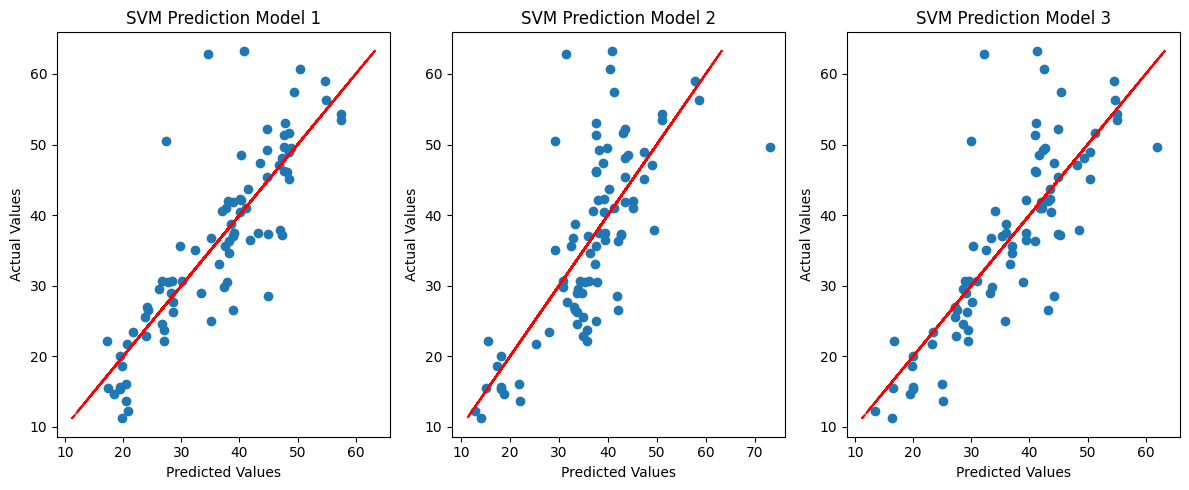

In [ ]:
# Prediction vs Actual plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.scatter(svm_predictions_1, y_test)
plt.plot(y_test, y_test, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM Prediction Model 1')

plt.subplot(1, 3, 2)
plt.scatter(svm_predictions_2, y_test)
plt.plot(y_test, y_test, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM Prediction Model 2')

plt.subplot(1, 3, 3)
plt.scatter(svm_predictions_3, y_test)
plt.plot(y_test, y_test, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('SVM Prediction Model 3')

plt.tight_layout()
plt.show()


#### Result and Analysis
The code above explains the support Vector Machine (SVM) with different parameters. These models are used to predict data using different kernels (rbf, poly, and linear). Below is an analysis of each model:

Model 1:
- Kernel: rbf
- Parameter C: 1 (default)
- Parameter epsilon: 0.1 (default)
- Hasil MAE (Mean Absolute Error): 4.588068213896125
- Hasil MSE (Mean Squared Error): 45.75780050527888
- Hasil R-squared (R2): 0.7272420708785974

Model 2:
- Kernel: poly
- Parameter C: 20
- Parameter epsilon: 0.01
- Hasil MAE: 6.566519618777069
- MSE Result: 78.48781265447825
- R2 result: 0.5321415582806621

Model 3:
- Kernel: linear
- Parameter C: 0.1
- Parameter epsilon: 0.01
- Hasil MAE: 5.053573486663545
- MSE Result: 56.383216833546435
- R2 result: 0.6639049672209019

In this context, the best model is Model 1 with the 'rbf' kernel and the default C parameters. This model has the lowest MAE, low MSE, and high R-squared, indicating that this model has better performance compared to Model 2 and Model 3. Model 2 with a 'poly' kernel and Model 3 with a 'linear' kernel ' has lower performance with higher MAE, higher MSE, and lower R-squared. Therefore, Model 1 is the best model among the three models given.



#### Conclusion
In the context of this analysis, Model 1 with the 'rbf' kernel and default C parameters has the best results among the three SVR models. This can be explained as follows:

1. **Mean Absolute Error (MAE):** Model 1 has the lowest MAE, which is around 4.59. MAE measures how far a model's predictions are from actual values, and the lower the MAE, the better the model is at predicting property values. Therefore, Model 1 has a lower prediction error rate compared to Model 2 and Model 3.

2. **Mean Squared Error (MSE):** Model 1 has a relatively low MSE, around 45.76. MSE measures how well a model estimates variations in the data. With a lower MSE, Model 1 more closely estimates variability in the data.

3. **R-squared (R2):** Model 1 has an R2 of around 0.73, which is quite high. R2 measures the extent to which the model can explain variations in the data. The higher the R2 value, the better the model is at explaining variation. Therefore, Model 1 is able to explain the variation in the data well.

Additionally, Model 1 has a default C parameter, which may be a good fit for this property valuation dataset. Other parameters used in Model 2 and Model 3 do not produce better results in terms of MAE, MSE, and R2.

Thus, based on the analysis results, Model 1 with the 'rbf' kernel and default C parameters is the best choice for predicting property valuation in this dataset. This model provides more accurate results and can explain data variations well compared to Model 2 and Model 3
